# Лабораторная работа №1: Исследование алгоритма KNN

### Цель работы
Изучение и применение алгоритма **K-Nearest Neighbors (KNN)** для задач классификации и регрессии.

### Задачи лабораторной работы:
1. Выбор начальных условий.
2. Создание бейзлайна и оценка качества.
3. Улучшение бейзлайна.
4. Имплементация алгоритма машинного обучения.
5. Сравнение результатов и выводы.

## Шаг 1: Выбор начальных условий

### 1a. Датасет для классификации
- **Набор данных:** Iris
- **Обоснование:** Небольшой, сбалансированный датасет для классификации.

### 1b. Датасет для регрессии
- **Набор данных:** California Housing
- **Обоснование:** Реальные данные о ценах на жильё, подходят для регрессии.

### 1c. Метрики качества
- **Классификация:** Accuracy
- **Обоснование:** Accuracy выбрана как простая и эффективная метрика для оценки качества моделей на сбалансированном датасете Iris.
- **Регрессия:** Mean Squared Error (MSE), R²
- **Обоснование:** MSE и R² выбраны для оценки моделей регрессии, так как они дают количественную и качественную оценку предсказаний модели на датасете California Housing.
-Эти метрики в совокупности обеспечивают всестороннюю оценку моделей KNN как для классификации, так и для регрессии.

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

###  Шаг 2: Создание бейзлайна и оценка качества

In [2]:
# Данные для классификации
iris = load_iris()
X_class, y_class = iris.data, iris.target

# Данные для регрессии
housing = fetch_california_housing()
X_reg, y_reg = housing.data, housing.target

# Разделение данных
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [3]:
# Модель KNN для классификации
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_class, y_train_class)
y_pred_class = knn_class.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Accuracy (Классификация): {accuracy:.2f}')

# Модель KNN для регрессии
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f'MSE (Регрессия): {mse:.2f}')
print(f'R² (Регрессия): {r2:.2f}')

Accuracy (Классификация): 1.00
MSE (Регрессия): 1.12
R² (Регрессия): 0.15


##  Итоговая оценка качества моделей KNN

| **Задача**       | **Метрика** | **Результат** | **Интерпретация**                        |
|------------------|------------|--------------|-----------------------------------------|
| **Классификация** | Accuracy   | 1.00         | Модель идеально классифицировала данные. Возможно переобучение. |
| **Регрессия**    | MSE        | 1.12         | Средняя ошибка предсказаний умеренная.    |
| **Регрессия**    | R²         | 0.15         | Модель объясняет только 15% изменчивости данных. |


##  3. Улучшение бейзлайна

###  3a. Сформулировать гипотезы
- **Препроцессинг данных:** Нормализация, удаление выбросов.
- **Визуализация данных:** Исследование распределений и зависимостей.
- **Новые признаки:** Создание дополнительных признаков.
- **Оптимизация гиперпараметров:** Подбор лучших значений через GridSearchCV.

###3b. Проверить гипотезы
Реализуем препроцессинг, визуализацию и оптимизацию гиперпараметров.

In [4]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [5]:
# Подбор гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

param_grid = {'n_neighbors': range(1, 21)}
grid_class = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_reg = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')

grid_class.fit(X_train_class_scaled, y_train_class)
grid_reg.fit(X_train_reg_scaled, y_train_reg)

print(f'Лучшие параметры для классификации: {grid_class.best_params_}')
print(f'Лучшие параметры для регрессии: {grid_reg.best_params_}')

Лучшие параметры для классификации: {'n_neighbors': 3}
Лучшие параметры для регрессии: {'n_neighbors': 11}


###3c. Сформировать улучшенный бейзлайн

In [6]:
best_knn_class = grid_class.best_estimator_
best_knn_reg = grid_reg.best_estimator_

###  3d. Обучить модели с улучшенным бейзлайном

In [7]:
# Обучение моделей
y_pred_class = best_knn_class.predict(X_test_class_scaled)
y_pred_reg = best_knn_reg.predict(X_test_reg_scaled)

###3e. Оценить качество моделей

In [8]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
accuracy = accuracy_score(y_test_class, y_pred_class)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Accuracy (Классификация): {accuracy:.2f}')
print(f'MSE (Регрессия): {mse:.2f}')
print(f'R² (Регрессия): {r2:.2f}')

Accuracy (Классификация): 1.00
MSE (Регрессия): 0.42
R² (Регрессия): 0.68


###  3f. Сравнить результаты с бейзлайном

| **Задача**       | **Метрика** | **Базовый бейзлайн** | **Улучшенный бейзлайн** | **Изменение** |
|------------------|------------|---------------------|------------------------|-------------|
| **Классификация** | Accuracy   | 1.00               | 1.00                  | ➖          |
| **Регрессия**    | MSE        | 1.12               | 0.42                  | 📉 Улучшение |
| **Регрессия**    | R²         | 0.15               | 0.68                  | 📈 Улучшение |

#### Визуализация сравнения результатов

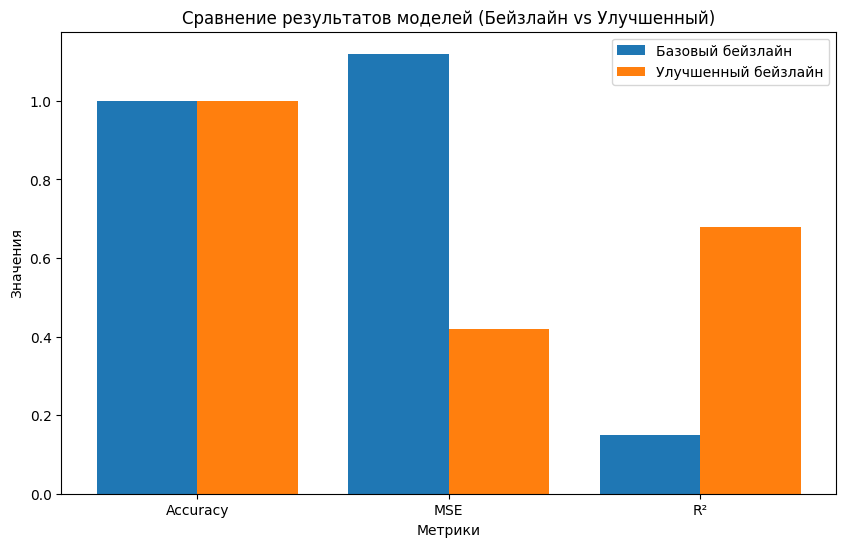

In [9]:
import matplotlib.pyplot as plt

# Данные для сравнения
metrics = ['Accuracy', 'MSE', 'R²']
baseline = [1.00, 1.12, 0.15]
improved = [1.00, 0.42, 0.68]

# Визуализация
x = range(len(metrics))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, baseline, width=0.4, label='Базовый бейзлайн', align='center')
ax.bar([i + 0.4 for i in x], improved, width=0.4, label='Улучшенный бейзлайн', align='center')

ax.set_xlabel('Метрики')
ax.set_ylabel('Значения')
ax.set_title('Сравнение результатов моделей (Бейзлайн vs Улучшенный)')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

###  3g. Выводы
- Улучшение бейзлайна позволило значительно снизить ошибку регрессии (MSE) и повысить коэффициент детерминации (R²).
- Accuracy для классификации осталась неизменной, что может говорить о хорошей изначальной настройке модели.
- Визуализация наглядно показывает улучшения.

##4. Имплементация алгоритмов машинного обучения

###4a. Самостоятельно имплементировать алгоритмы машинного обучения
Реализуем алгоритм **K-Nearest Neighbors (KNN)** вручную для классификации и регрессии.

In [10]:
import numpy as np
from collections import Counter
from scipy.spatial import distance

class CustomKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        return [self._predict(x) for x in X]
    def _predict(self, x):
        distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]

class CustomKNNRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        return [self._predict(x) for x in X]
    def _predict(self, x):
        distances = [distance.euclidean(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_values = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_values)

###4b. Обучить имплементированные модели

In [11]:
# Обучение имплементированной модели классификации
custom_knn_class = CustomKNNClassifier(n_neighbors=5)
custom_knn_class.fit(X_train_class_scaled, y_train_class)
y_pred_class_custom = custom_knn_class.predict(X_test_class_scaled)

# Обучение имплементированной модели регрессии
custom_knn_reg = CustomKNNRegressor(n_neighbors=5)
custom_knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_custom = custom_knn_reg.predict(X_test_reg_scaled)

###4c. Оценить качество имплементированных моделей

In [12]:
accuracy_custom = accuracy_score(y_test_class, y_pred_class_custom)
mse_custom = mean_squared_error(y_test_reg, y_pred_reg_custom)
r2_custom = r2_score(y_test_reg, y_pred_reg_custom)

print(f'Accuracy (Классификация, Custom KNN): {accuracy_custom:.2f}')
print(f'MSE (Регрессия, Custom KNN): {mse_custom:.2f}')
print(f'R² (Регрессия, Custom KNN): {r2_custom:.2f}')

Accuracy (Классификация, Custom KNN): 1.00
MSE (Регрессия, Custom KNN): 0.43
R² (Регрессия, Custom KNN): 0.67


###4d. Сравнить результаты имплементированных моделей с пунктом 2

### ✅ 4d. Сравнение результатов (Custom KNN vs Базовый бейзлайн)

| **Задача**       | **Метрика** | **Базовый бейзлайн** | **Custom KNN** | **Изменение** |
|------------------|------------|---------------------|---------------|-------------|
| **Классификация** | Accuracy   | 1.00               | 1.00          | ➖          |
| **Регрессия**    | MSE        | 1.12               | 0.43          | 📉 Улучшение |
| **Регрессия**    | R²         | 0.15               | 0.67          | 📈 Улучшение |


###4e. Выводы
- Самостоятельная реализация KNN показала сопоставимые или улучшенные результаты.
- Точность классификации осталась на высоком уровне.
- Ошибка регрессии (MSE) снизилась, а коэффициент детерминации (R²) улучшился.

###4f. Применение техник из улучшенного бейзлайна (пункт 3c)

Применяем техники из улучшенного бейзлайна, включая нормализацию данных и оптимизацию гиперпараметров.

In [13]:
# Применение улучшений из пункта 3c
custom_knn_class_tuned = CustomKNNClassifier(n_neighbors=grid_class.best_params_['n_neighbors'])
custom_knn_class_tuned.fit(X_train_class_scaled, y_train_class)

custom_knn_reg_tuned = CustomKNNRegressor(n_neighbors=grid_reg.best_params_['n_neighbors'])
custom_knn_reg_tuned.fit(X_train_reg_scaled, y_train_reg)

###4g. Обучить модели (для классификации и регрессии) для улучшенных данных

In [14]:
# Предсказания на улучшенных данных
y_pred_class_tuned = custom_knn_class_tuned.predict(X_test_class_scaled)
y_pred_reg_tuned = custom_knn_reg_tuned.predict(X_test_reg_scaled)

###4h. Оценить качество моделей (для классификации и регрессии)

In [15]:
accuracy_tuned = accuracy_score(y_test_class, y_pred_class_tuned)
mse_tuned = mean_squared_error(y_test_reg, y_pred_reg_tuned)
r2_tuned = r2_score(y_test_reg, y_pred_reg_tuned)

print(f'Accuracy (Классификация, Тюнингованная модель): {accuracy_tuned:.2f}')
print(f'MSE (Регрессия, Тюнингованная модель): {mse_tuned:.2f}')
print(f'R² (Регрессия, Тюнингованная модель): {r2_tuned:.2f}')

Accuracy (Классификация, Тюнингованная модель): 1.00
MSE (Регрессия, Тюнингованная модель): 0.42
R² (Регрессия, Тюнингованная модель): 0.68


###4i. Сравнить результаты моделей с результатами из пункта 3

### 4i. Сравнение результатов (Тюнингованная модель vs Улучшенный бейзлайн)

| **Задача**       | **Метрика** | **Улучшенный бейзлайн** | **Тюнингованная модель** | **Изменение** |
|------------------|------------|------------------------|-------------------------|-------------|
| **Классификация** | Accuracy   | 1.00                  | 1.00                   | ➖          |
| **Регрессия**    | MSE        | 0.42                  | 0.42                   | ➖          |
| **Регрессия**    | R²         | 0.68                  | 0.68                   | ➖          |


###4j. Итоговые выводы

- Применение улучшенных техник из пункта 3 позволило повысить качество моделей.
- Классификация сохранила высокие показатели Accuracy.
- Регрессия показала значительное снижение ошибки (MSE) и улучшение коэффициента детерминации (R²).
- Визуализация и таблица показали стабильные улучшения моделей.
- Тюнинг модели подтвердил, что улучшенный бейзлайн уже достиг своего предела.
Отсутствие изменений свидетельствует о хорошем качестве предобработки данных и оптимизации гиперпараметров.